<a href="https://colab.research.google.com/github/shimaaahmedd/Speech-Emotion-Recognition/blob/main/Speech_Recognition_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import keras 
import sklearn
import librosa, librosa.display
import tensorflow as tf
import pathlib
import seaborn as sns
from librosa.feature import melspectrogram as mel
from scipy import signal
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
import tensorflow as tf 
from IPython import display
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input,Dense, Flatten,Conv1D,MaxPooling1D
drive.mount('/content/drive')
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from IPython.display import Audio
from keras.optimizers import SGD

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Downloading and Understanding the dataset

In [ ]:
states=['SAD', 'DIS', 'FEA', 'HAP', 'NEU','ANG']
path="/content/drive/MyDrive/Crema/"
files=os.listdir(path)
y=[]
sound=[]
freq=[]
duration=[]
wavefroms=[]
max_freq=-1111
for f in files:
  #Label Vector order = SAD, DIS , FEA , HAP ,NEU , ANG 
  label_vect = []
  audio_signal,frequency_sampling = librosa.load(path+f)
  audio_binary = tf.io.read_file(path+f)
  audio, _ = tf.audio.decode_wav(audio_binary)
  waveform=tf.squeeze(audio, axis=-1)
  if 'SAD' in f:
    label_vect = [1,0,0,0,0,0]
    y.append(label_vect)
  elif 'DIS' in f:
    label_vect = [0,1,0,0,0,0]
    y.append(label_vect)
  elif 'FEA' in f:
    label_vect = [0,0,1,0,0,0]
    y.append(label_vect)
  elif 'HAP' in f:
    label_vect = [0,0,0,1,0,0]
    y.append(label_vect)
  elif 'NEU' in f:
    label_vect = [0,0,0,0,1,0]
    y.append(label_vect)
  elif 'ANG' in f:
    label_vect = [0,0,0,0,0,1]
    y.append(label_vect)

  audiot=round(audio_signal.shape[0] / float(frequency_sampling), 2)
  duration.append(audiot)
  sound.append(audio_signal)
  freq.append(frequency_sampling)
  if frequency_sampling>max_freq:
    max_freq=frequency_sampling
  audio_signal=np.array(audio_signal) 
  audio_signal=audio_signal.astype('float')
  audio=np.array(audio_signal)
  frequency_sampling=np.array(frequency_sampling)
print('Max Freq. = '+str(max_freq))
y = np.array(y)
print("Label shape = "+str(y.shape))

Max Freq. = 22050
Label shape = (7442, 6)


# Spectrums and Audios For each class

##Sad Emotion Record

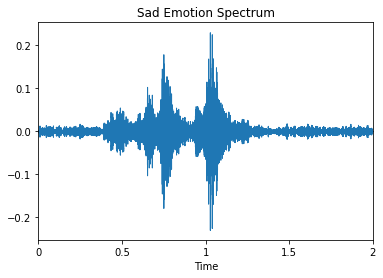

In [ ]:
path = '/content/drive/MyDrive/Crema/1001_DFA_SAD_XX.wav'
audio_signal,frequency_sampling = librosa.load(path)
plt.figure()
plt.title('Sad Emotion Spectrum')
librosa.display.waveplot(audio_signal, sr=frequency_sampling)
Audio(path)

##Disapponited Emotion Record

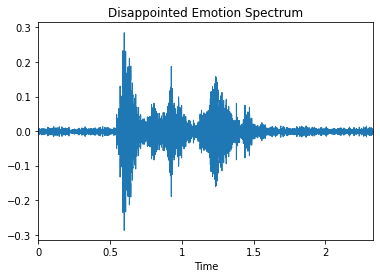

In [ ]:
path = '/content/drive/MyDrive/Crema/1001_DFA_DIS_XX.wav'
audio_signal,frequency_sampling = librosa.load(path)
plt.figure()
plt.title('Disappointed Emotion Spectrum')
librosa.display.waveplot(audio_signal, sr=frequency_sampling)
Audio(path)

##Fear Emotion Record

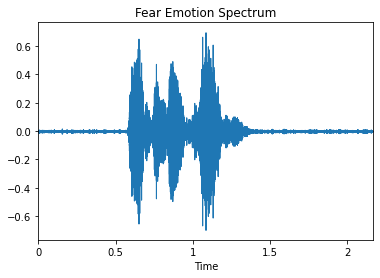

In [ ]:
path = '/content/drive/MyDrive/Crema/1001_DFA_FEA_XX.wav'
audio_signal,frequency_sampling = librosa.load(path)
plt.figure()
plt.title('Fear Emotion Spectrum')
librosa.display.waveplot(audio_signal, sr=frequency_sampling)
Audio(path)

##Happy Emotion Record

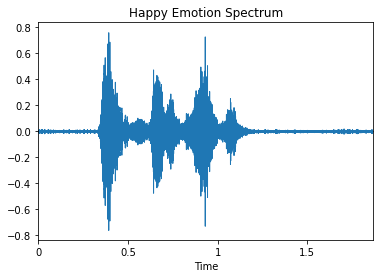

In [ ]:
path = '/content/drive/MyDrive/Crema/1001_DFA_HAP_XX.wav'
audio_signal,frequency_sampling = librosa.load(path)
plt.figure()
plt.title('Happy Emotion Spectrum')
librosa.display.waveplot(audio_signal, sr=frequency_sampling)
Audio(path)

##Neutral Emotion Record

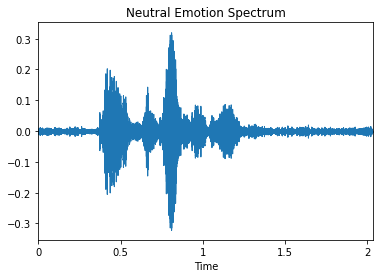

In [ ]:
path = '/content/drive/MyDrive/Crema/1001_DFA_NEU_XX.wav'
audio_signal,frequency_sampling = librosa.load(path)
plt.figure()
plt.title('Neutral Emotion Spectrum')
librosa.display.waveplot(audio_signal, sr=frequency_sampling)
Audio(path)

##Angry Emotion Record

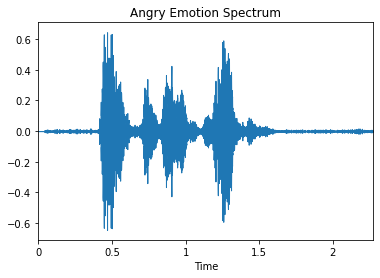

In [ ]:
path = '/content/drive/MyDrive/Crema/1001_DFA_ANG_XX.wav'
audio_signal,frequency_sampling = librosa.load(path)
plt.figure()
plt.title('Angry Emotion Spectrum')
librosa.display.waveplot(audio_signal, sr=frequency_sampling)
Audio(path)

# Extracting Zero Crossing and Energy features


In [ ]:
zero_crossing=[]
energy=[]
zero_size=[]
energy_size=[]
for audio_data in sound:
  zero_crosses=librosa.feature.zero_crossing_rate(y=audio_data)[0]
  zero_size.append(zero_crosses.size)
  zero_crossing.append(zero_crosses)
  ener= librosa.feature.rms(y=audio_data)[0]
  energy.append(ener)
  energy_size.append(ener.size)
max_energy = np.max(energy_size)
#print("max energy",max_energy)
for i in range (0,len(zero_crossing)) :
  numberofzeros=216-zero_crossing[i].size
  zero_crossing[i] = np.concatenate([zero_crossing[i], np.zeros(numberofzeros)])
  #print(zero_crossing[i].shape)
for j in range (0,len(energy)) :
  numberofzeros=216-energy[j].size
  energy[j] = np.concatenate([energy[j], np.zeros(numberofzeros)])
#print(energy[0].size)

# Splitting and reshaping Zero Crossing dataset 

In [ ]:
zeroTraining=[]
yzeroTraining=[]
zeroValidation=[]
yzeroValidation=[]
zeroTest=[]
yzeroTest=[]

zeroTraining,zeroTest, yzeroTraining,yzeroTest = train_test_split(zero_crossing, y, test_size=0.30)
zeroTraining,zeroValidation, yzeroTraining,yzeroValidation = train_test_split(zeroTraining, yzeroTraining, test_size=0.05) 

yzeroTraining=np.array(yzeroTraining)
yzeroTest=np.array(yzeroTest)
yzeroValidation=np.array(yzeroValidation)

zeroTraining = np.array(zeroTraining)
zeroTraining=zeroTraining.reshape((zeroTraining.shape[0], zeroTraining.shape[1], 1))
zeroValidation = np.array(zeroValidation)
zeroValidation = zeroValidation.reshape(zeroValidation.shape[0],zeroValidation.shape[1], 1)


print(zeroTraining.shape)
print(yzeroTraining.shape)
print(zeroValidation.shape)
print(yzeroValidation.shape)

(4948, 216, 1)
(4948, 6)
(261, 216, 1)
(261, 6)


# 1D Models for Zero Crossing

In [ ]:
input_layer=Input(shape=(zeroTraining.shape[1],1))
model=Conv1D(64,kernel_size=(3), strides=1,padding = 'same')(input_layer)
model=Conv1D(64,kernel_size=(3), strides=1,padding = 'same')(model)
model=MaxPooling1D(pool_size=(2), padding='same')(model)
model=tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99,epsilon=0.001)(model)
model = tf.keras.layers.Dropout(.5)(model)  

model=Conv1D(128,kernel_size=(3), strides=1,padding = 'same')(model)   
model=Conv1D(128,kernel_size=(3), strides=1,padding = 'same')(model)
model=MaxPooling1D(pool_size=(2),padding='same')(model)
model=tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99,epsilon=0.001)(model)
model = tf.keras.layers.Dropout(.9)(model)    


model=Conv1D(256, kernel_size=(3), strides=1,padding = 'same')(model)
model=Conv1D(256, kernel_size=(3), strides=1,padding = 'same')(model)
model=MaxPooling1D(pool_size=(2), padding='same')(model)   
model=tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99,epsilon=0.001)(model)
model = tf.keras.layers.Dropout(.9)(model) 

flat=Flatten()(model)
model=Dense(4096, activation='relu')(flat)
model=tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99,epsilon=0.001)(model)
model = tf.keras.layers.Dropout(.9)(model) 
model=Dense(1000, activation='relu')(model)
model=tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99,epsilon=0.001)(model)
model = tf.keras.layers.Dropout(.9)(model) 
model=Dense(6, activation='softmax')(model)
main_model = Model(input_layer, model)
epochs=80
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
main_model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics='accuracy')
main_model.summary()
history = main_model.fit(x = zeroTraining, y =yzeroTraining,batch_size=32, verbose = 1,validation_data=(zeroValidation, np.array(yzeroValidation)) ,epochs=epochs)
print("History = "+str(history.history))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 216, 1)]          0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 216, 64)           256       
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 216, 64)           12352     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 108, 64)           0         
_________________________________________________________________
tf.math.multiply_5 (TFOpLamb (None, 108, 64)           0         
_________________________________________________________________
tf.__operators__.add_5 (TFOp (None, 108, 64)           0         
_________________________________________________________________
tf.identity_13 (TFOpLambda)  (None, 108, 64)           0   

# Plot validation and training loss for Zero Crossing

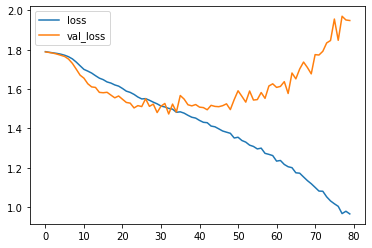

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# Evaluation of test set of Zero Crossing


In [ ]:
zeroTest = np.array(zeroTest)
zeroTest=zeroTest.reshape((zeroTest.shape[0], zeroTest.shape[1], 1))
y_pred = np.argmax(main_model.predict(zeroTest), axis=1)
y_true=np.argmax(yzeroTest, axis=1)
test_acc = sklearn.metrics.accuracy_score(y_true, y_pred)
print(f'Test set accuracy of Zero Crossing: {test_acc:.0%}')

Test set accuracy of Zero Crossing: 33%


# Confusion matrix of Zero Crossing

tf.Tensor(
[[139  58  46  35  64  15]
 [ 56 128  40  37  34  74]
 [ 92  92  64  65  49  35]
 [ 43  79  33 121  54  53]
 [ 68  37  28  76 103  28]
 [ 15  75  28  63  18 188]], shape=(6, 6), dtype=int32)


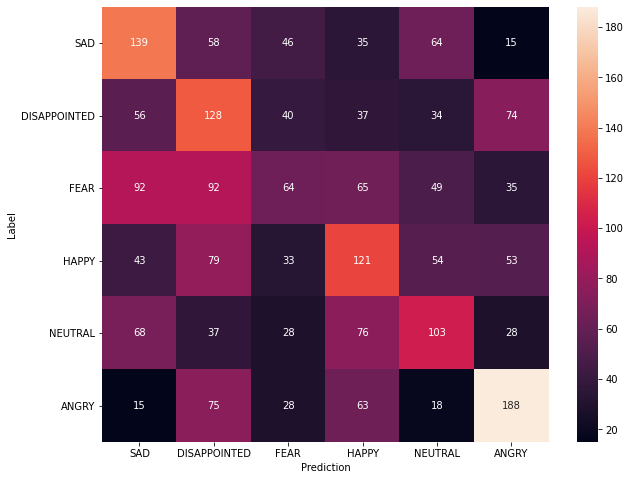

In [ ]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
print(confusion_mtx)
plt.figure(figsize=(10, 8))
commands=['SAD', 'DISAPPOINTED' , 'FEAR' , 'HAPPY' ,'NEUTRAL' , 'ANGRY']
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# F-Score of Zero Crossing


In [ ]:
f1_score(y_true, y_pred, average=None)

array([0.36103896, 0.30548926, 0.20125786, 0.31025641, 0.31117825,
       0.48205128])

# Splitting and Reshaping Energy

In [ ]:
energyTraining=[]
yenergyTraining=[]
energyValidation=[]
yenergyValidation=[]
energyTest=[]
yenergyTest=[]

energyTraining,energyTest, yenergyTraining,yenergyTest = train_test_split(energy, y, test_size=0.30)
energyTraining,energyValidation, yenergyTraining,yenergyValidation = train_test_split(energyTraining, yenergyTraining, test_size=0.05) 

yenergyTraining=np.array(yenergyTraining)
yenergyTest=np.array(yenergyTest)
yenergyValidation=np.array(yenergyValidation)

energyTraining = np.array(energyTraining)
energyTraining=energyTraining.reshape((energyTraining.shape[0], energyTraining.shape[1], 1))
energyValidation = np.array(energyValidation)
energyValidation = energyValidation.reshape(energyValidation.shape[0],energyValidation.shape[1], 1)


print(energyTraining.shape)
print(yenergyTraining.shape)
print(energyValidation.shape)
print(yenergyValidation.shape)

(4948, 216, 1)
(4948, 6)
(261, 216, 1)
(261, 6)


# 1D Model for Energy

In [ ]:
input_layer=Input(shape=(energyTraining.shape[1],1))
model=Conv1D(216, kernel_size=(5), strides=1, padding = 'same')(input_layer)
model=Conv1D(216,kernel_size=(5), strides=1,padding = 'same')(model)
model=Conv1D(216,kernel_size=(5), strides=1,padding = 'same')(model)
model=MaxPooling1D(pool_size=(3), padding='same')(model)
model = tf.keras.layers.Dropout(.4)(model)
model=Conv1D(108,kernel_size=(5),strides=1,padding = 'same')(model)
model=Conv1D(108,kernel_size=(5),strides=1,padding = 'same')(model)
model=Conv1D(108,kernel_size=(5),strides=1,padding = 'same')(model)
model=MaxPooling1D(pool_size=(3), padding='same')(model)
model = tf.keras.layers.Dropout(.5)(model)
model=Conv1D(54, kernel_size=(5),strides=1,padding = 'same')(model)
model=Conv1D(54, kernel_size=(5),strides=1,padding = 'same')(model)
model=Conv1D(54, kernel_size=(5),strides=1,padding = 'same')(model)
model=MaxPooling1D(pool_size=(3), padding='same')(model)
model = tf.keras.layers.Dropout(.4)(model)
model=Conv1D(27, kernel_size=(5),strides=1,padding = 'same')(model)
model=Conv1D(27, kernel_size=(5),strides=1,padding = 'same')(model)
model=Conv1D(27, kernel_size=(5),strides=1,padding = 'same')(model)
model=MaxPooling1D(pool_size=(3), padding='same')(model)
model = tf.keras.layers.Dropout(.3)(model)
model=Conv1D(13, kernel_size=(5),strides=1,padding = 'same')(model)
model=Conv1D(13, kernel_size=(5),strides=1,padding = 'same')(model)
model=Conv1D(13, kernel_size=(5),strides=1,padding = 'same')(model)
model=MaxPooling1D(pool_size=(3), padding='same')(model)
model = tf.keras.layers.Dropout(.2)(model)


flat=Flatten()(model)
model=Dense(10000, activation='relu')(flat)
model=Dense(6, activation='softmax')(model)
main_model = Model(input_layer, model)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
main_model.compile(loss='categorical_crossentropy', optimizer=opt,metrics='accuracy')
main_model.summary()
history = main_model.fit(x = energyTraining, y =yenergyTraining,batch_size=50,verbose = 1,validation_data=(energyValidation, np.array(yenergyValidation)),epochs=30)
print("History = "+str(history.history))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 216, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 216, 216)          1296      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 216)          233496    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 216)          233496    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 72, 216)           0         
_________________________________________________________________
tf.identity_3 (TFOpLambda)   (None, 72, 216)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 72, 108)           1167

# Plot validation and training loss for Energy


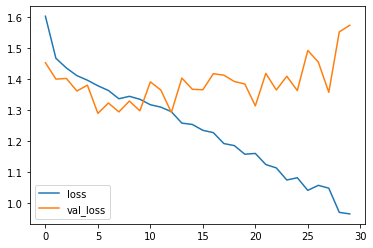

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# Evaluation of test set of Energy


In [ ]:
energyTest = np.array(energyTest)
energyTest=energyTest.reshape((energyTest.shape[0], energyTest.shape[1], 1))
y_pred = np.argmax(main_model.predict(energyTest), axis=1)
y_true=np.argmax(yenergyTest, axis=1)
test_acc = sklearn.metrics.accuracy_score(y_true, y_pred)
print(f'Test set accuracy of Energy: {test_acc:.0%}')

Test set accuracy of Energy: 43%


# Confusion matrix of Energy

tf.Tensor(
[[215  25  57  23  64   7]
 [103  89  62  35  52  34]
 [ 82  35 112  78  37  52]
 [ 16  23  57 135  59  58]
 [ 44  22  41  60 178   3]
 [  7  29  19  62  31 227]], shape=(6, 6), dtype=int32)


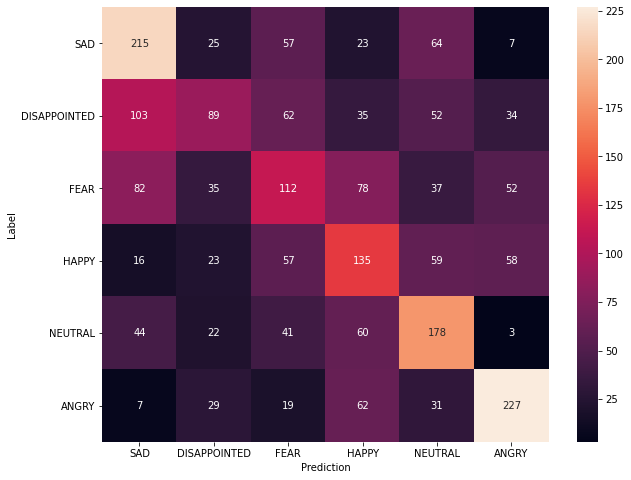

In [ ]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
print(confusion_mtx)
plt.figure(figsize=(10, 8))
commands=['SAD', 'DISAPPOINTED' , 'FEAR' , 'HAPPY' ,'NEUTRAL' , 'ANGRY']
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# F-Score of Energy 

In [ ]:
f1_score(y_true, y_pred, average=None)

array([0.5011655 , 0.29765886, 0.30107527, 0.36437247, 0.46293888,
       0.6005291 ])

#Extraction of Spectogram

216
128


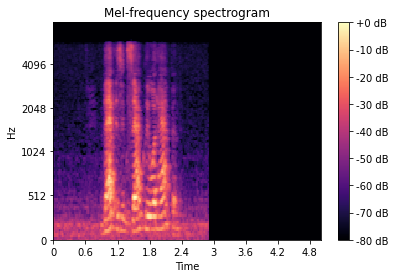

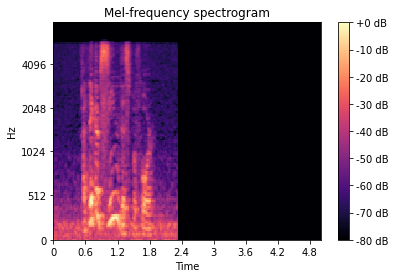

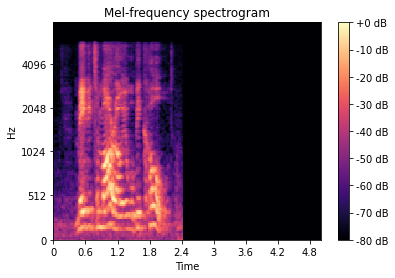

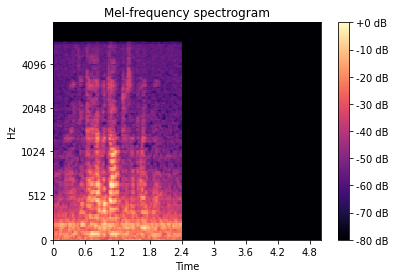

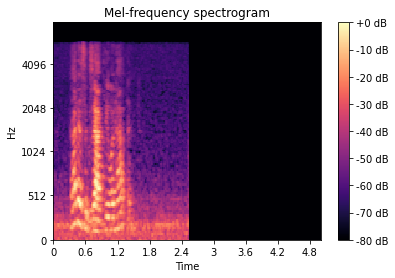

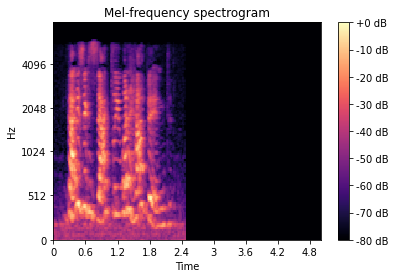

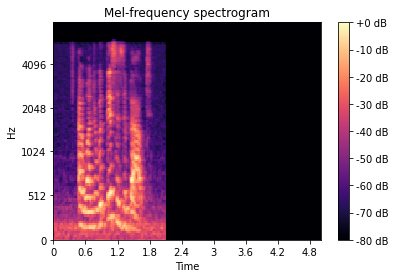

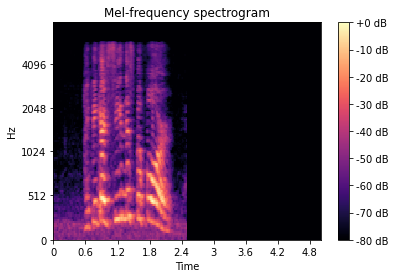

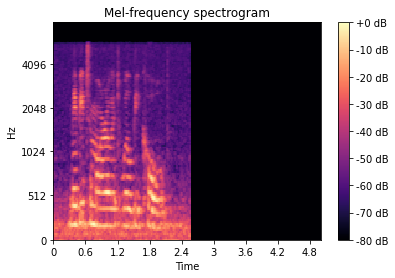

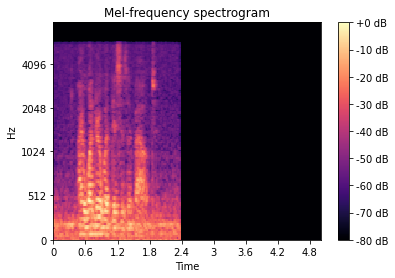

In [ ]:
spect=[]
mels=[]
max_col=-1
max_row=-1
for i in range(len(sound)):
  Melspectogram = mel(y=sound[i], sr=freq[i])
  #print(Melspectogram.shape)
  # print(len(Melspectogram[0]))
  if(len(Melspectogram[0])>max_col):
    max_col=len(Melspectogram[0])
  if(len(Melspectogram)>max_row):
    max_row=len(Melspectogram)
  mels.append(Melspectogram)
print(max_col)
print(max_row)
for j in range(len(mels)):
    new_column=np.zeros((len(mels[j]),1))
    while len(mels[j][0])<max_col:
        mels[j]=np.append(mels[j], new_column, axis=1)
    # print(mels[j].shape)
for k in range(len(mels)):
    new_row=np.zeros((len(mels[j][0]),0))
    while len(mels[j])<max_row:
        mels[j]=np.append(mels[j], new_row, axis=0)
    # print(mels[j].shape)
for i in range(10):
  fig, ax = plt.subplots()
  Melspectogram_dB = librosa.power_to_db(mels[i], ref=np.max)
  img = librosa.display.specshow(Melspectogram_dB, x_axis='time', y_axis='mel', sr=frequency_sampling,fmax=8000, ax=ax)
  fig.colorbar(img, ax=ax, format='%+2.0f dB')
  ax.set(title='Mel-frequency spectrogram')
  spect.append(Melspectogram_dB)

#Splitting Dataset of Spectogram


In [ ]:
Training=[]
Test=[]
Validation=[]
yValidation=[]
yTraining=[]
yTest=[]
melTraining = []
melTest = []
melValidation = []
ymelTraining = []
ymelTest = []
ymelValidation = []

melTraining,melTest, ymelTraining,ymelTest = train_test_split(mels, y, test_size=0.30)
melTraining,melValidation, ymelTraining,ymelValidation = train_test_split(melTraining, ymelTraining, test_size=0.05) 

print(np.array(melTraining).shape)
print(np.array(melValidation).shape)
print(np.array(ymelTraining).shape)
print(np.array(ymelValidation).shape)

(4948, 128, 216)
(261, 128, 216)
(4948, 6)
(261, 6)


# Models of 2D

In [ ]:
#Reshaping
MelTrainArray = np.array(melTraining)
MelTrainArray=MelTrainArray.reshape((MelTrainArray.shape[0], MelTrainArray.shape[1], MelTrainArray.shape[2], 1))
MelValArray = np.array(melValidation)
melValArray = MelValArray.reshape(MelValArray.shape[0],MelValArray.shape[1], MelValArray.shape[2], 1)

print(melValArray.shape)
input_layer=Input(shape=(MelValArray.shape[1],MelValArray.shape[2],1))

model=Conv2D(8, kernel_size=(3,3),strides=1, padding = 'same')(input_layer)
model=Conv2D(8, kernel_size=(3,3),strides=1, padding = 'same')(model)

model=MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding = 'valid')(model)

model=Conv2D(16, kernel_size=(3,3), strides=1,padding = 'valid')(model)
model=Conv2D(16, kernel_size=(3,3), strides=1,padding = 'valid')(model)

model=MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding = 'valid')(model)

model=Conv2D(32, kernel_size=(3,3), strides=1,padding = 'valid')(model)
model=Conv2D(32, kernel_size=(3,3), strides=1,padding = 'valid')(model)

model=MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding = 'valid')(model)

model=Conv2D(64, kernel_size=(3,3), strides=1,padding = 'valid')(model)
model=Conv2D(64, kernel_size=(3,3), strides=1,padding = 'valid')(model)

model=MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model)

model=Flatten()(model)
model=Dense(120, activation='relu')(model)
model=Dense(6, activation='softmax')(model)
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
main_model = Model(input_layer, model)
main_model.compile(loss='categorical_crossentropy', optimizer=opt,metrics='accuracy')
main_model.summary()
history = main_model.fit(x = MelTrainArray, y = np.array(ymelTraining),batch_size=8,verbose = 1,validation_data=(MelValArray, np.array(ymelValidation)),epochs=50)
print("History = "+str(history.history))



(261, 128, 216, 1)
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 216, 1)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 216, 8)       80        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 216, 8)       584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 108, 8)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 62, 106, 16)       1168      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 104, 16)       2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 

# Plot validation and training loss for Spectrogram

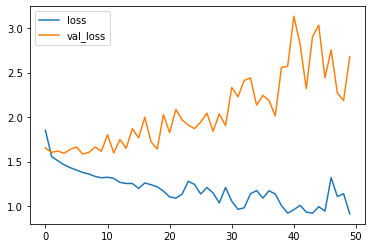

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# Test evaulation of Spectogram

In [ ]:
melTest = np.array(melTest)
melTest=melTest.reshape((melTest.shape[0], melTest.shape[1], melTest.shape[2], 1))
y_pred = np.argmax(main_model.predict(melTest), axis=1)
y_true=np.argmax(ymelTest, axis=1)
test_acc = sklearn.metrics.accuracy_score(y_true, y_pred)
print(f'Test set accuracy of Spectogram: {test_acc:.0%}')

Test set accuracy of Spectogram: 38%


# Confusion matrix of Spectogram

tf.Tensor(
[[272  21   1   6  58   2]
 [156  72  19  42  80  38]
 [151  37  42  58  59  28]
 [ 34  29  40 118 104  76]
 [ 94  10   5  20 158   9]
 [  7  34  41  86  30 196]], shape=(6, 6), dtype=int32)


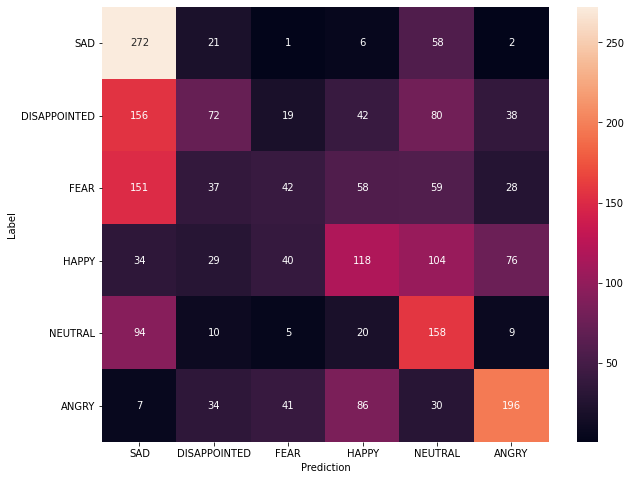

In [ ]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
print(confusion_mtx)
plt.figure(figsize=(10, 8))
commands=['SAD', 'DISAPPOINTED' , 'FEAR' , 'HAPPY' ,'NEUTRAL' , 'ANGRY']
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# F-Score of Spectogram

In [ ]:
f1_score(y_true, y_pred, average=None)

array([0.50651769, 0.23606557, 0.16061185, 0.32284542, 0.40254777,
       0.52759085])